In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("C:\\Users\\Umesh Gupta\\Downloads\\raw data\\Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
#checking of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


<AxesSubplot:ylabel='None'>

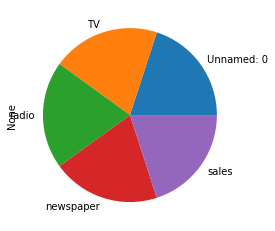

In [4]:

df.count().plot.pie()

In [5]:
# for checking nan value
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
#basic info about dataset
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
# unnamed is not showing any relation with my target coulm
df.drop(columns=["Unnamed: 0"],inplace=True,axis=1)

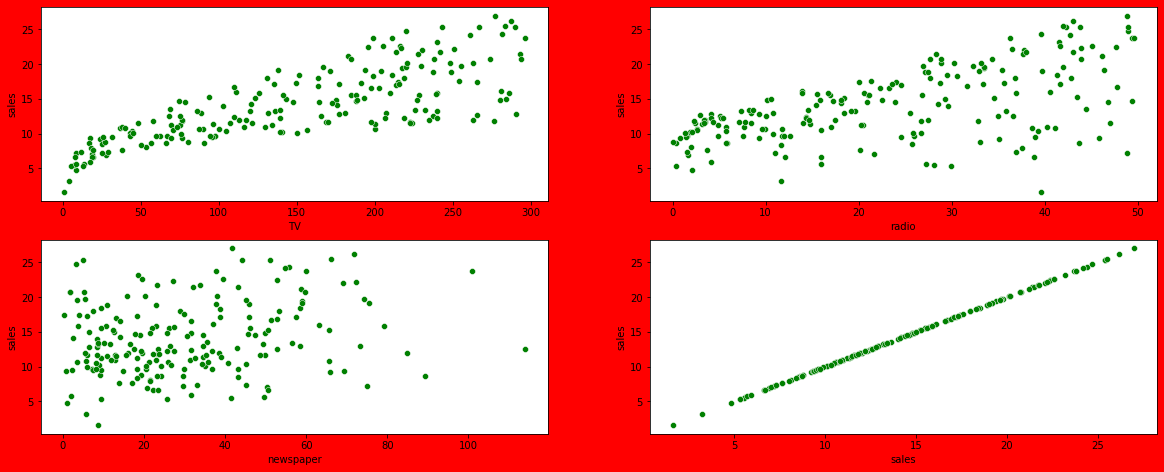

In [8]:
#plotting scatter plot to study realtion among features and labels
plt.figure(figsize=(20,25),facecolor='red')
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.scatterplot(y=df["sales"],x=df[column],color="green")
    plotnumber+=1
plt.show()

In [ ]:
AS I CAN SEE TV AND RADIO IS SHOWING LINEAR RELATIONSHIP WITH TARGET COLUMN AND NEWSPAPER IS NOT SHOWING ANY

<function matplotlib.pyplot.show(close=None, block=None)>

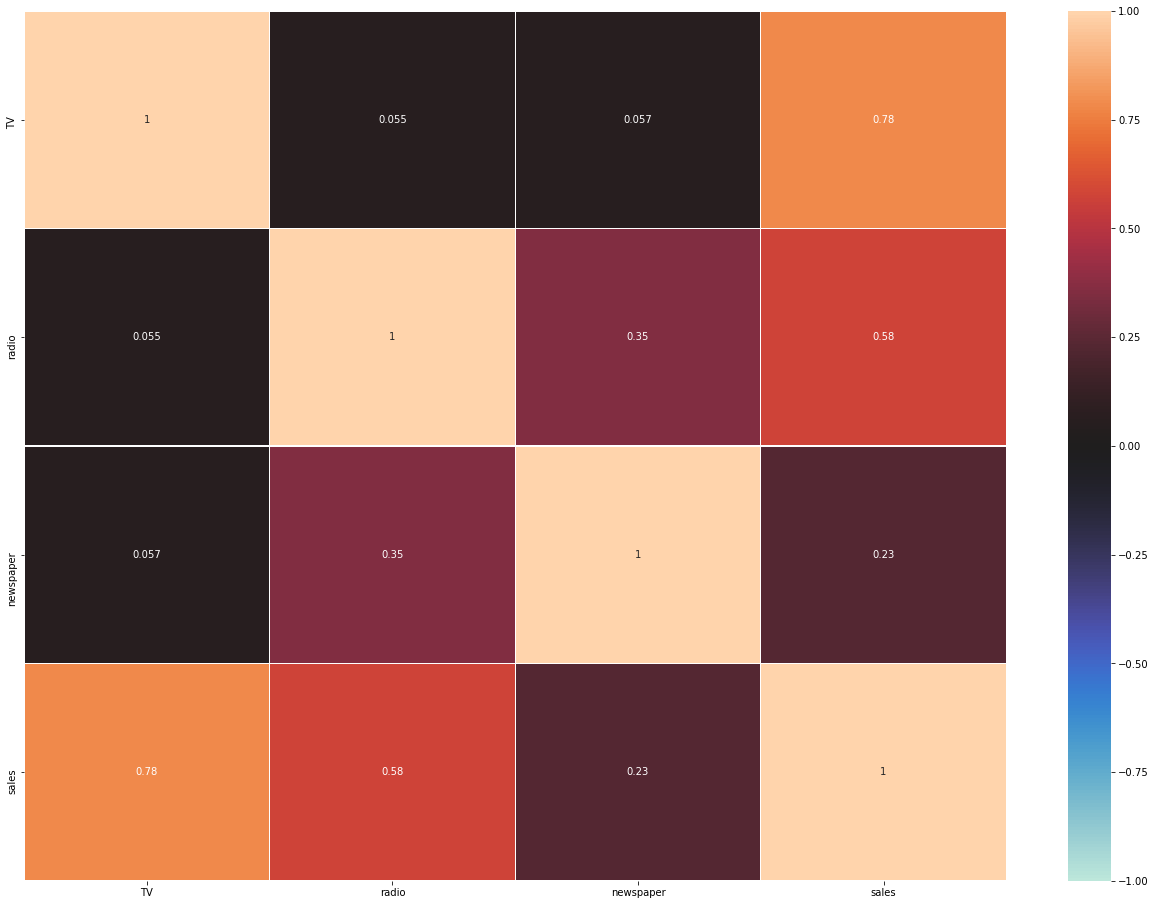

In [9]:
#plotting heatmap to cross check correaltion among features and labels
df_corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show

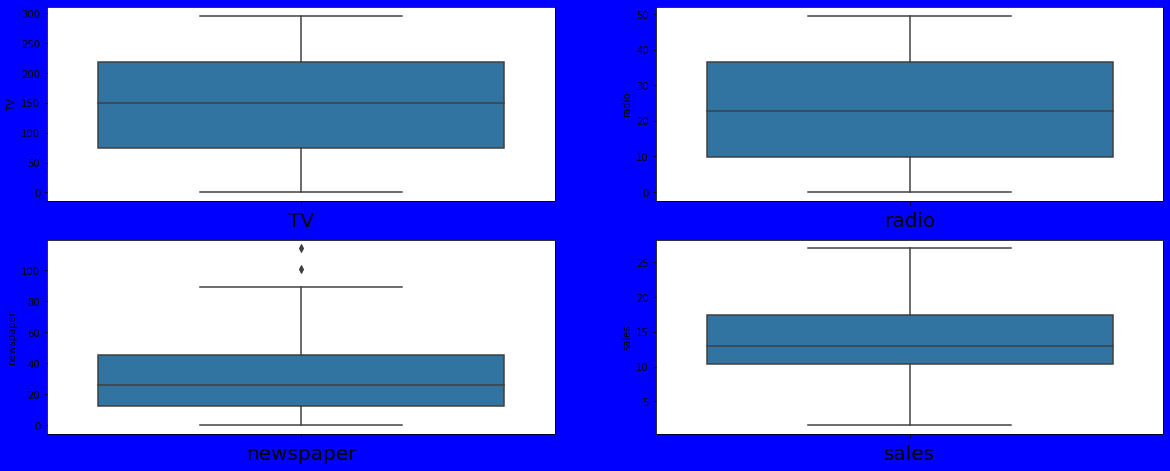

In [10]:
#plotting box plot to see outliers in the datset
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(y=df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [11]:
#checking skewness
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [12]:
#dropping sales column
x=df.drop(columns='sales')
y=df['sales']

In [13]:
#using power transform to remove skewness in the dataset
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method='yeo-johnson')

In [14]:
for i in x:
    x[[i]]=scale.fit_transform(x[[i]])

In [15]:
#skewness removed
x.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

# model building

In [16]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [17]:
#scaling dataset
scale=StandardScaler()
x_scaled=scale.fit_transform(x)


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=50)

# linear regression

In [19]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=linear.predict(x_test)

In [21]:
r2_score(y_test,y_pred)

0.8892453139335891

In [22]:
cross_val_score(linear,x_scaled,y,cv=5).mean()

0.8978060430607069

# decision tree 

In [23]:
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [24]:
y_pred=clf.predict(x_test)

In [25]:
r2_score(y_test,y_pred)

0.9551396462714843

In [26]:
cross_val_score(clf,x_scaled,y,cv=5).mean()

0.9565921403638342

# gbdt

In [27]:
gd=GradientBoostingRegressor()
gd.fit(x_train,y_train)

GradientBoostingRegressor()

In [28]:
y_pred=gd.predict(x_test)

In [29]:
r2_score(y_test,y_pred)

0.9869217325501558

In [30]:
cross_val_score(gd,x_scaled,y,cv=5).mean()

0.9777464761039024

# svr

In [31]:
sv=SVR()
sv.fit(x_train,y_train)

SVR()

In [32]:
y_pred=sv.predict(x_test)

In [33]:
r2_score(y_test,y_pred)

0.9292296471489248

In [34]:
cross_val_score(sv,x_scaled,y,cv=5).mean()

0.9171386899137435

# decison tree is my best model

In [35]:
grid_params= {
    'min_samples_leaf':[1,5,6,7,10,15],
    'min_samples_split':[1,2,3,4,5,6],
    'random_state':[5,10,20,30,55,66]
}

In [36]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid = grid_params,
                          cv=3,n_jobs=-1)

In [37]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 5, 6, 7, 10, 15],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'random_state': [5, 10, 20, 30, 55, 66]})

In [39]:
grid_search.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 55}

In [40]:
clf = DecisionTreeRegressor(min_samples_leaf=1, min_samples_split= 3, random_state=55)
clf.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_split=3, random_state=55)

In [41]:
y_pred=clf.predict(x_test)

In [43]:
r2_score(y_test,y_pred)

0.9600146541537466

In [51]:
cross_val_score(clf,x_scaled,y,cv=5).mean()

0.9548859045252105

In [52]:
import pickle
filename='sales.pk1'
pickle.dump(clf,open(filename,'wb'))